In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"/src")

from models import *
from features import *
from data.dataset import SpectrogramDataset
from torch.utils.data import random_split

In [3]:
wdir = os.getcwd()
path = f"{wdir}/../data/processed/musicnet"
spec_dataset = SpectrogramDataset(
    f"{path}/train_data", label_dir=f"{path}/train_labels"
)

# mini_dataset = [spec_dataset[i] for i in range(30)]
mini_dataset = [(spec_dataset[i][0][:, :100],
                 spec_dataset[i][1][:, :30],
                 spec_dataset[i][2]) for i in range(30)]

token_size = spec_dataset[0][0].shape[0]
seq_len = spec_dataset[0][0].shape[1]
output_size = spec_dataset[0][1].shape[1]

train_set, valid_set = random_split(spec_dataset, [0.8, 0.2])

train_dl = DataLoader(train_set, batch_size=2, shuffle=True)
valid_dl = DataLoader(valid_set, batch_size=2, shuffle=True)
trainer = LSTMTrainer()
trainer.create_model(emb_size = 100, 
                     hidden_size = 10, 
                     output_size = output_size,
                     token_size = token_size,
                     dropout = 0.2,
                     batch_size = 5,
                     bias = True)
trainer.set_dataloaders(train_loader=train_dl, val_loader=valid_dl, test_loader=None)
history = trainer.train(0.001, 0.001, 20)

Validation epoch 1: 100%|██████████| 13/13 [00:02<00:00,  4.41it/s]



Epoch: 0 	Training Loss: 55.5726 	Validation Loss: 69.5321
	 	Training Accuracy: 8.28% 	Validation Accuracy: 9.54%


Validation epoch 2: 100%|██████████| 13/13 [00:03<00:00,  4.25it/s]



Epoch: 1 	Training Loss: 55.3028 	Validation Loss: 69.1938
	 	Training Accuracy: 20.50% 	Validation Accuracy: 24.75%


Validation epoch 3: 100%|██████████| 13/13 [00:03<00:00,  4.30it/s]



Epoch: 2 	Training Loss: 55.0834 	Validation Loss: 68.9591
	 	Training Accuracy: 27.51% 	Validation Accuracy: 29.60%


Validation epoch 4: 100%|██████████| 13/13 [00:02<00:00,  4.36it/s]



Epoch: 3 	Training Loss: 54.9190 	Validation Loss: 68.8278
	 	Training Accuracy: 30.08% 	Validation Accuracy: 31.45%


Validation epoch 5: 100%|██████████| 13/13 [00:02<00:00,  4.36it/s]



Epoch: 4 	Training Loss: 54.7945 	Validation Loss: 68.7453
	 	Training Accuracy: 31.24% 	Validation Accuracy: 32.38%


Validation epoch 6: 100%|██████████| 13/13 [00:03<00:00,  4.30it/s]



Epoch: 5 	Training Loss: 54.6851 	Validation Loss: 68.6859
	 	Training Accuracy: 31.82% 	Validation Accuracy: 32.99%


Validation epoch 7: 100%|██████████| 13/13 [00:02<00:00,  4.38it/s]



Epoch: 6 	Training Loss: 54.5856 	Validation Loss: 68.6139
	 	Training Accuracy: 32.67% 	Validation Accuracy: 33.29%


Validation epoch 8: 100%|██████████| 13/13 [00:02<00:00,  4.40it/s]



Epoch: 7 	Training Loss: 54.4998 	Validation Loss: 68.6174
	 	Training Accuracy: 33.14% 	Validation Accuracy: 33.02%


Validation epoch 9: 100%|██████████| 13/13 [00:03<00:00,  4.09it/s]



Epoch: 8 	Training Loss: 54.4190 	Validation Loss: 68.3263
	 	Training Accuracy: 33.57% 	Validation Accuracy: 25.98%


Validation epoch 10: 100%|██████████| 13/13 [00:03<00:00,  4.24it/s]



Epoch: 9 	Training Loss: 54.3430 	Validation Loss: 68.5681
	 	Training Accuracy: 34.23% 	Validation Accuracy: 33.73%


Validation epoch 11: 100%|██████████| 13/13 [00:03<00:00,  4.29it/s]



Epoch: 10 	Training Loss: 54.2745 	Validation Loss: 68.4957
	 	Training Accuracy: 34.80% 	Validation Accuracy: 32.10%


Validation epoch 12: 100%|██████████| 13/13 [00:03<00:00,  4.29it/s]



Epoch: 11 	Training Loss: 54.2084 	Validation Loss: 68.5984
	 	Training Accuracy: 35.11% 	Validation Accuracy: 33.04%


Validation epoch 13: 100%|██████████| 13/13 [00:03<00:00,  4.29it/s]



Epoch: 12 	Training Loss: 54.1443 	Validation Loss: 68.6556
	 	Training Accuracy: 35.77% 	Validation Accuracy: 33.33%


Validation epoch 14: 100%|██████████| 13/13 [00:03<00:00,  4.32it/s]



Epoch: 13 	Training Loss: 54.0883 	Validation Loss: 68.1350
	 	Training Accuracy: 35.94% 	Validation Accuracy: 26.11%


Validation epoch 15: 100%|██████████| 13/13 [00:03<00:00,  4.22it/s]



Epoch: 14 	Training Loss: 54.0301 	Validation Loss: 68.6183
	 	Training Accuracy: 36.32% 	Validation Accuracy: 31.78%


Validation epoch 16: 100%|██████████| 13/13 [00:02<00:00,  4.44it/s]



Epoch: 15 	Training Loss: 53.9778 	Validation Loss: 68.1147
	 	Training Accuracy: 36.60% 	Validation Accuracy: 30.33%


Validation epoch 17: 100%|██████████| 13/13 [00:02<00:00,  4.46it/s]



Epoch: 16 	Training Loss: 53.9243 	Validation Loss: 68.6244
	 	Training Accuracy: 37.10% 	Validation Accuracy: 32.37%


Validation epoch 18: 100%|██████████| 13/13 [00:03<00:00,  4.31it/s]



Epoch: 17 	Training Loss: 53.8715 	Validation Loss: 68.0018
	 	Training Accuracy: 37.19% 	Validation Accuracy: 29.24%


Validation epoch 19: 100%|██████████| 13/13 [00:02<00:00,  4.37it/s]



Epoch: 18 	Training Loss: 53.8239 	Validation Loss: 68.5950
	 	Training Accuracy: 37.28% 	Validation Accuracy: 30.93%


Validation epoch 20: 100%|██████████| 13/13 [00:03<00:00,  4.20it/s]


Epoch: 19 	Training Loss: 53.7779 	Validation Loss: 68.5085
	 	Training Accuracy: 37.74% 	Validation Accuracy: 30.19%


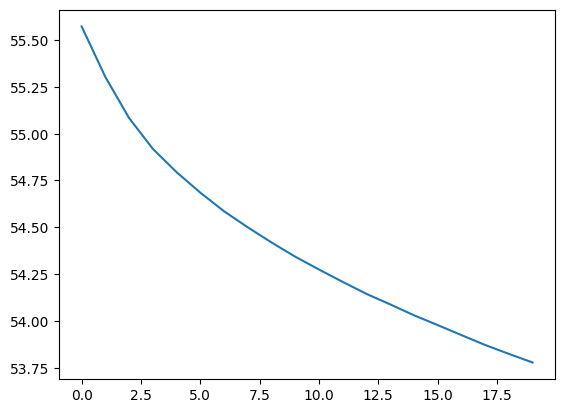

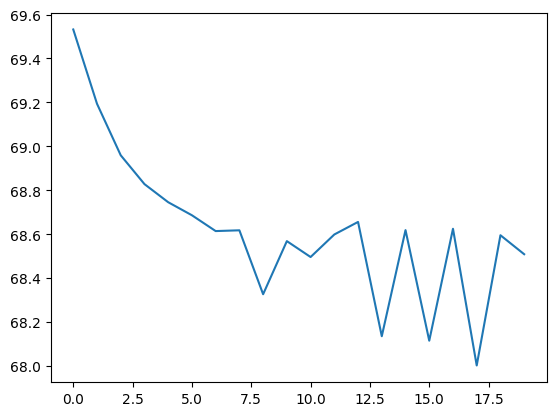

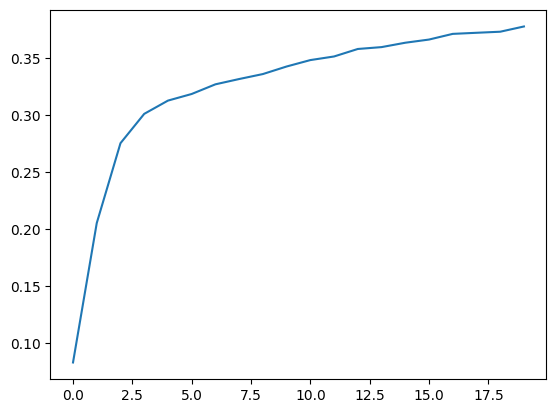

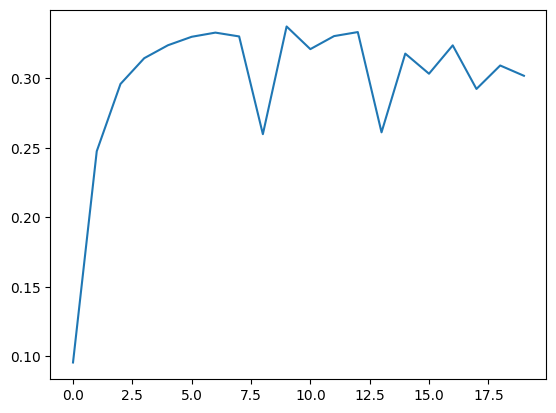

In [8]:
import matplotlib.pyplot as plt

val_loss = history["val_loss"].to_list()
train_loss = history["train_loss"].to_list()
val_acc = history["val_acc"].to_list()
train_acc = history["train_acc"].to_list()
x = np.arange(history.shape[0])

fig = plt.figure(0)
plt.plot(x, train_loss)
fig = plt.figure(1)
plt.plot(x, val_loss)
fig = plt.figure(2)
plt.plot(x, train_acc)
fig = plt.figure(3)
plt.plot(x, val_acc)
plt.show()